# Cancer Classification with keras

We'll be trying to predict if a tumor is either bening or not using a simple nn sequential model.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Getting the data 

In [13]:
df = pd.read_csv('cancer_classification.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA 

In [11]:
print('There is a ' + str(df['benign_0__mal_1'].mean()*100) + '% for the cancer to be malign.' )

There is a 62.741652021089635% for the cancer to be malign.


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

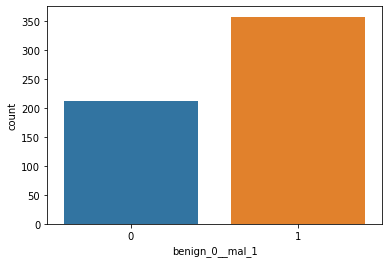

In [10]:
sns.countplot(x=df['benign_0__mal_1'])

And the correlation between benign_0__mal_1 and any other variable.

<AxesSubplot:>

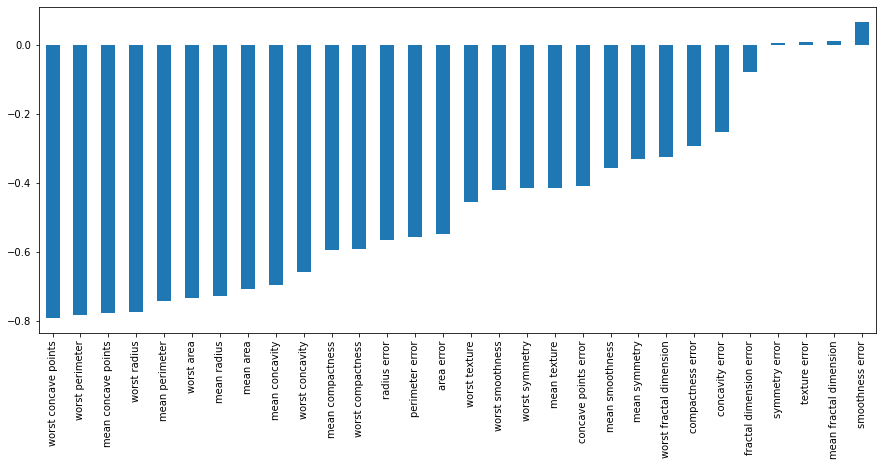

In [14]:
plt.figure(figsize=(15,6))
df.corr()[:-1]['benign_0__mal_1'].sort_values().plot(kind='bar')

There seems to be quite a good correlation between benign_0__mal_1 and a lot of other variables, the model should perform really good. Also, the correlation of any variable with any other variable

<AxesSubplot:>

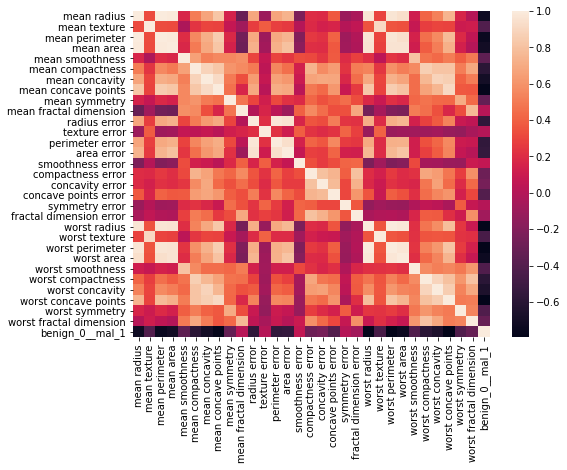

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr())

## Data Splitting ans scaling

In [18]:
X=df.drop('benign_0__mal_1',axis=1).values

In [20]:
y = df.benign_0__mal_1.values

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [26]:
X_train = scaler.fit_transform(X_train)

In [27]:
X_test= scaler.transform(X_test)

## Model creation and fitting

In [29]:
from tensorflow.keras.models import Sequential

In [30]:
from tensorflow.keras.layers import Dense,Dropout

In [33]:
X_train.shape

(398, 30)

In [34]:
nn = Sequential()

nn.add(Dense(30, activation='relu')) #input
nn.add(Dense(15, activation='relu'))
nn.add(Dense(1, activation='sigmoid')) #output

nn.compile(loss='binary_crossentropy', optimizer='adam')

In [35]:
nn.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test))

Epoch 1/600
13/13 [==============================] - 4s 31ms/step - loss: 0.6696 - val_loss: 0.6530
Epoch 2/600
13/13 [==============================] - 0s 8ms/step - loss: 0.6335 - val_loss: 0.6226
Epoch 3/600
13/13 [==============================] - 0s 11ms/step - loss: 0.6044 - val_loss: 0.5936
Epoch 4/600
13/13 [==============================] - 0s 9ms/step - loss: 0.5731 - val_loss: 0.5619
Epoch 5/600
13/13 [==============================] - 0s 7ms/step - loss: 0.5386 - val_loss: 0.5281
Epoch 6/600
13/13 [==============================] - 0s 7ms/step - loss: 0.5025 - val_loss: 0.4890
Epoch 7/600
13/13 [==============================] - 0s 10ms/step - loss: 0.4608 - val_loss: 0.4479
Epoch 8/600
13/13 [==============================] - 0s 10ms/step - loss: 0.4197 - val_loss: 0.4073
Epoch 9/600
13/13 [==============================] - 0s 11ms/step - loss: 0.3769 - val_loss: 0.3674
Epoch 10/600
13/13 [==============================] - 0s 7ms/step - loss: 0.3415 - val_loss: 0.3349
Epoc

Epoch 163/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0407 - val_loss: 0.1369
Epoch 164/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0347 - val_loss: 0.1318
Epoch 165/600
13/13 [==============================] - 0s 9ms/step - loss: 0.0313 - val_loss: 0.1331
Epoch 166/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0324 - val_loss: 0.1321
Epoch 167/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0313 - val_loss: 0.1329
Epoch 168/600
13/13 [==============================] - 0s 9ms/step - loss: 0.0317 - val_loss: 0.1332
Epoch 169/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0303 - val_loss: 0.1372
Epoch 170/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0326 - val_loss: 0.1327
Epoch 171/600
13/13 [==============================] - 0s 10ms/step - loss: 0.0309 - val_loss: 0.1340
Epoch 172/600
13/13 [==============================] - 0s 9ms/step - loss: 0.0300 - val_lo

Epoch 244/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0280 - val_loss: 0.1451
Epoch 245/600
13/13 [==============================] - 0s 9ms/step - loss: 0.0260 - val_loss: 0.1422
Epoch 246/600
13/13 [==============================] - 0s 10ms/step - loss: 0.0255 - val_loss: 0.1406
Epoch 247/600
13/13 [==============================] - 0s 9ms/step - loss: 0.0233 - val_loss: 0.1464
Epoch 248/600
13/13 [==============================] - 0s 12ms/step - loss: 0.0251 - val_loss: 0.1443
Epoch 249/600
13/13 [==============================] - 0s 10ms/step - loss: 0.0263 - val_loss: 0.1441
Epoch 250/600
13/13 [==============================] - 0s 10ms/step - loss: 0.0253 - val_loss: 0.1415
Epoch 251/600
13/13 [==============================] - 0s 9ms/step - loss: 0.0266 - val_loss: 0.1398
Epoch 252/600
13/13 [==============================] - 0s 10ms/step - loss: 0.0281 - val_loss: 0.1438
Epoch 253/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0246 - va

13/13 [==============================] - 0s 11ms/step - loss: 0.0140 - val_loss: 0.2154
Epoch 406/600
13/13 [==============================] - 0s 9ms/step - loss: 0.0138 - val_loss: 0.2175
Epoch 407/600
13/13 [==============================] - 0s 11ms/step - loss: 0.0166 - val_loss: 0.2198
Epoch 408/600
13/13 [==============================] - 0s 10ms/step - loss: 0.0140 - val_loss: 0.2190
Epoch 409/600
13/13 [==============================] - 0s 12ms/step - loss: 0.0140 - val_loss: 0.2219
Epoch 410/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0157 - val_loss: 0.2229
Epoch 411/600
13/13 [==============================] - 0s 9ms/step - loss: 0.0182 - val_loss: 0.2223
Epoch 412/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0133 - val_loss: 0.2278
Epoch 413/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0133 - val_loss: 0.2252
Epoch 414/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0159 - val_loss: 0.2240


Epoch 486/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0105 - val_loss: 0.2874
Epoch 487/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0100 - val_loss: 0.2900
Epoch 488/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0107 - val_loss: 0.2894
Epoch 489/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0122 - val_loss: 0.2946
Epoch 490/600
13/13 [==============================] - 0s 9ms/step - loss: 0.0101 - val_loss: 0.2960
Epoch 491/600
13/13 [==============================] - 0s 9ms/step - loss: 0.0103 - val_loss: 0.2936
Epoch 492/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0097 - val_loss: 0.2958
Epoch 493/600
13/13 [==============================] - 0s 9ms/step - loss: 0.0124 - val_loss: 0.2996
Epoch 494/600
13/13 [==============================] - 0s 10ms/step - loss: 0.0117 - val_loss: 0.2948
Epoch 495/600
13/13 [==============================] - 0s 10ms/step - loss: 0.0099 - val_l

Epoch 567/600
13/13 [==============================] - 0s 10ms/step - loss: 0.0068 - val_loss: 0.3801
Epoch 568/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0091 - val_loss: 0.3929
Epoch 569/600
13/13 [==============================] - 0s 7ms/step - loss: 0.0103 - val_loss: 0.3942
Epoch 570/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0070 - val_loss: 0.3943
Epoch 571/600
13/13 [==============================] - 0s 10ms/step - loss: 0.0070 - val_loss: 0.3914
Epoch 572/600
13/13 [==============================] - 0s 9ms/step - loss: 0.0075 - val_loss: 0.3876
Epoch 573/600
13/13 [==============================] - 0s 10ms/step - loss: 0.0062 - val_loss: 0.3913
Epoch 574/600
13/13 [==============================] - 0s 10ms/step - loss: 0.0067 - val_loss: 0.3959
Epoch 575/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0073 - val_loss: 0.3939
Epoch 576/600
13/13 [==============================] - 0s 8ms/step - loss: 0.0071 - val

In [36]:
losses = pd.DataFrame(nn.history.history)

<AxesSubplot:>

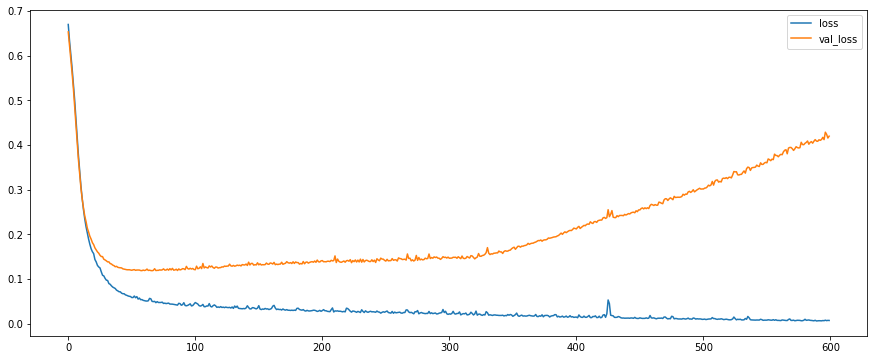

In [39]:
losses.plot(figsize=(15,6))

##### Without regards the number of epochs the model is overfitted (by a lot), we'll add a callback to fix this

In [40]:
nn_do = Sequential()

nn_do.add(Dense(30, activation='relu')) #input
nn_do.add(Dense(15, activation='relu'))
nn_do.add(Dense(1, activation='sigmoid')) #output

nn_do.compile(loss='binary_crossentropy', optimizer='adam')

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
callback = EarlyStopping(monitor='val_loss', mode='min', patience=25, verbose=1,restore_best_weights=True)

In [48]:
nn_do.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test),callbacks=[callback])

Epoch 1/600
13/13 [==============================] - 1s 35ms/step - loss: 0.7352 - val_loss: 0.7027
Epoch 2/600
13/13 [==============================] - 0s 12ms/step - loss: 0.6867 - val_loss: 0.6768
Epoch 3/600
13/13 [==============================] - 0s 11ms/step - loss: 0.6594 - val_loss: 0.6533
Epoch 4/600
13/13 [==============================] - 0s 12ms/step - loss: 0.6341 - val_loss: 0.6287
Epoch 5/600
13/13 [==============================] - 0s 10ms/step - loss: 0.6089 - val_loss: 0.6048
Epoch 6/600
13/13 [==============================] - 0s 9ms/step - loss: 0.5832 - val_loss: 0.5802
Epoch 7/600
13/13 [==============================] - 0s 11ms/step - loss: 0.5543 - val_loss: 0.5530
Epoch 8/600
13/13 [==============================] - 0s 8ms/step - loss: 0.5246 - val_loss: 0.5208
Epoch 9/600
13/13 [==============================] - 0s 9ms/step - loss: 0.4912 - val_loss: 0.4886
Epoch 10/600
13/13 [==============================] - 0s 10ms/step - loss: 0.4583 - val_loss: 0.4565
Ep

In [49]:
losses_do = pd.DataFrame(nn_do.history.history)

<AxesSubplot:>

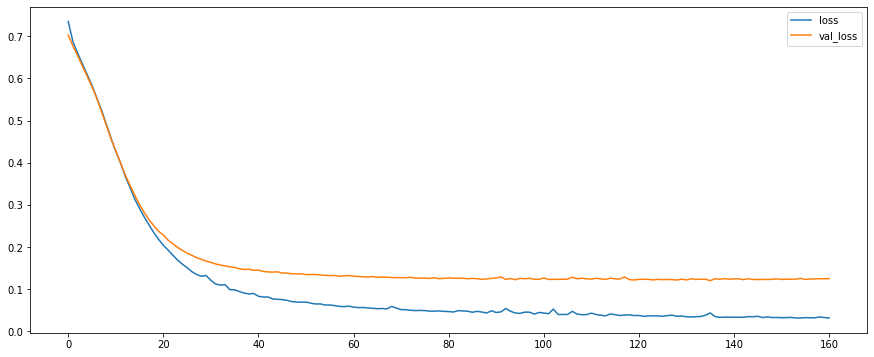

In [52]:
losses_do.plot(figsize=(15,6))

#### Overfitting is avoided but, judging by the gap between the loss and val_loss line, the performance isn't really that good. Let's add some Droput layers

In [53]:
nn_do2 = Sequential()

nn_do2.add(Dense(30, activation='relu'))   #input
nn_do2.add(Dropout(0.5))                   #dropuot layer

nn_do2.add(Dense(15, activation='relu'))
nn_do2.add(Dropout(0.5))                   #dropuot layer

nn_do2.add(Dense(1, activation='sigmoid')) #output

nn_do2.compile(loss='binary_crossentropy', optimizer='adam')

In [54]:
nn_do2.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test),callbacks=[callback])

Epoch 1/600
13/13 [==============================] - 1s 27ms/step - loss: 0.7053 - val_loss: 0.6901
Epoch 2/600
13/13 [==============================] - 0s 10ms/step - loss: 0.6885 - val_loss: 0.6818
Epoch 3/600
13/13 [==============================] - 0s 10ms/step - loss: 0.6821 - val_loss: 0.6707
Epoch 4/600
13/13 [==============================] - 0s 8ms/step - loss: 0.6650 - val_loss: 0.6536
Epoch 5/600
13/13 [==============================] - 0s 8ms/step - loss: 0.6510 - val_loss: 0.6379
Epoch 6/600
13/13 [==============================] - 0s 10ms/step - loss: 0.6522 - val_loss: 0.6195
Epoch 7/600
13/13 [==============================] - 0s 11ms/step - loss: 0.6272 - val_loss: 0.5988
Epoch 8/600
13/13 [==============================] - 0s 7ms/step - loss: 0.6153 - val_loss: 0.5788
Epoch 9/600
13/13 [==============================] - 0s 11ms/step - loss: 0.5969 - val_loss: 0.5583
Epoch 10/600
13/13 [==============================] - 0s 9ms/step - loss: 0.5735 - val_loss: 0.5351
Epo

In [55]:
losses_do2 = pd.DataFrame(nn_do2.history.history)

<AxesSubplot:>

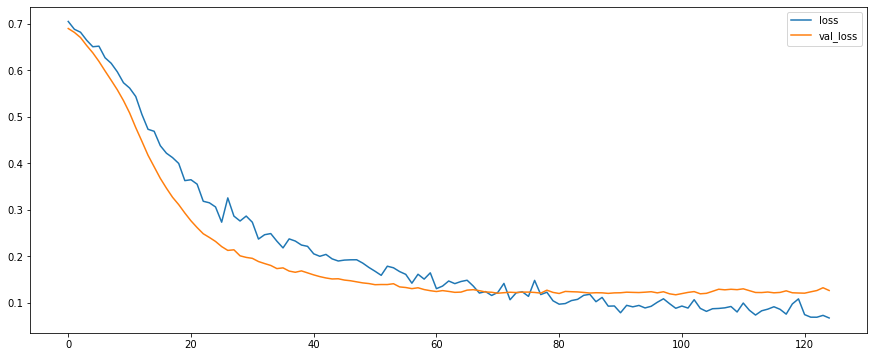

In [56]:
losses_do2.plot(figsize=(15,6))

#### The performance should be way better than from what we started with. Let's check the predictions to corroborate this 

In [65]:
y_pred = np.round(nn_do2.predict(X_test))

In [66]:
from sklearn.metrics import classification_report,confusion_matrix

In [67]:
print(classification_report(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        66
           1       0.97      0.98      0.98       105

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



[[ 63   3]
 [  2 103]]


With 97% accuracy we can say for sure the model is quite good, further work can be done to improve even further this result but that's far from the point of this proyect.